In [1]:
import time, os
import numpy as np, pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
# 2163 total constraints
# iterate = [10, 25, 50, 100, 200, 500, 750, 1000, 1500, 2000, 2163]
iterate = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n = 10

g = open("allConstraints.txt", "rt")
constraint = g.readlines()
g.close()

num_files = len(iterate)
runningTime = iterate

means = []
lowerbound = []
upperbound = []

# runtime_data = pd.DataFrame(columns=iterate, index=range(1,11))
mnist_runtime = pd.DataFrame(columns=iterate, index=range(1, n+1))

### Testing data collection on random entries
- Making sure our constraints aren't duplicated

for num_constraints in iterate:
        arr_constraints = [] # size i in iterate
        arr_runtimes = [] # size n
        
        arr_constraints = random.sample(range(0,2162), num_constraints)
        for i in range(1,11):
#             timeRun = createFile(arr_constraints)
            runtime_data.loc[i,num_constraints] = random.random()
    
runtime_data.to_csv('runtime_data.csv')

runtime_data

### Updated code, saves to CSV file

In [3]:
def getStates():
    # run 10 times each iterate number to get 5 num summary and plot mean with variance
    for num_constraints in iterate:
        arr_constraints = [] # size i in iterate
        arr_runtimes = [] # size n
        print("new constraints used")
        
        for i in range(1,11):
            arr_constraints = random.sample(range(0,2163), num_constraints)
#             print(arr_constraints)
            timeRun = createFile(arr_constraints)
            mnist_runtime.loc[i,num_constraints] = timeRun
            arr_runtimes.append(timeRun)
            arr_constraints = []
    
mnist_runtime.to_csv('synth_runtime_anal.csv')


def createFile(constraints):
    f = open('mnist.smt2', 'w')
    # have this in a file to read from
    h = open("smtGuts.txt", "r")
    for line in h:
        f.write(line)

    for j in constraints:
        f.write(constraint[j])

    f.write("(check-synth)")
    f.close()

    start_time = time.time()
    os.system('../../cvc5/build/bin/cvc5 --lang=sygus2 mnist.smt2')

    runTime = time.time() - start_time
    
    # runs through getStates function to use for mean calculation
    return runTime
        

### the old code

def getStates():
    # run 10 times each iterate number to get 5 num summary and plot mean with variance
    for num_constraints in iterate:
        arr_constraints = [] # size i in iterate
        arr_runtimes = [] # size n
        for j in range(num_constraints*n + 1):
            arr_constraints.append(random.randrange(0, 2162))
    #             if we have enough constraints, then run a cvc5 file with these constrinats
            if ((j % num_constraints) == 0) & (j != 0): 
                    # run cvc5, gather runtime data, store somewhere
                timeRun = createFile(arr_constraints)
                arr_runtimes.append(timeRun)
                arr_constraints = []
        mean = np.mean(arr_runtimes)
        stdev = np.std(arr_runtimes)
        means.append(mean)
        lowerbound.append(mean - stdev)
        upperbound.append(mean + stdev)

def createFile(constraints):
    f = open('mnist.smt2', 'w')
    # have this in a file to read from
    h = open("smtGuts.txt", "r")
    for line in h:
        f.write(line)

    for j in constraints:
        f.write(constraint[j])

    f.write("(check-synth)")
    f.close()

    start_time = time.time()
    os.system('../../cvc5/build/bin/cvc5 --lang=sygus2 mnist.smt2')

    runTime = time.time() - start_time
    
    # runs through getStates function to use for mean calculation
    return runTime
        

### Runs everything

In [4]:
getStates()

new constraints used
(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Re

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

In [10]:
mnist_runtime.to_csv('mnist_runtime.csv')

### Data manipulation, get from CSV file/dataframe of runtimes

In [6]:
means = []
lowerbound = []
upperbound = []

for i in iterate:
    data = mnist_runtime[i]
    mean = data.mean()
    stdev = data.std()
    lowbound = mean - stdev
    upbound = mean + stdev
    means.append(mean)
    lowerbound.append(lowbound)
    upperbound.append(upbound)

print(f"means: {means}; lowerbound: {lowerbound}; upperbound: {upperbound}")

means: [1.0028030633926392, 1.0964089632034302, 2.030554437637329, 2.652263569831848, 4.187439560890198, 5.415907216072083, 9.08219256401062, 30.30184473991394, 57.97146141529083, 55.01078486442566]; lowerbound: [0.5308146537284584, 0.8498827639726052, 1.3419806713346243, 2.115429632341037, 2.899379186934002, 3.3388242101924965, 5.610925771501552, -19.537580774949163, -5.178336556396069, 4.056236178027653]; upperbound: [1.4747914730568201, 1.3429351624342551, 2.7191282039400337, 3.189097507322659, 5.475499934846393, 7.492990221951668, 12.553459356519689, 80.14127025477704, 121.12125938697773, 105.96533355082366]


### Plot function

In [7]:
def plotRunTime():
    z = np.polyfit(iterate, means, 1)
    p = np.poly1d(z)

    fontsize = 16
    plt.rcParams.update({'font.size': fontsize})
#     rc('font', **{'family': 'serif', 'serif': ['Times']})
#     rc('text', usetex=True)

    c = '#ff0000'
    plt.fill_between(iterate, lowerbound, upperbound, color = '#FF9F9F')
    plt.plot(iterate, means, color = c, marker = 'o')
    
#     plt.plot(iterate, p(iterate), linestyle = '--', color = c)
    plt.legend(['Mean', 'Mean stdev'])
    plt.xlabel('Number of Constraints', size = fontsize)
    plt.ylabel('Runtime (seconds)', size=fontsize)
    plt.title('CVC5 Runtime on Varied Number of Constraints (MNIST)', size = fontsize + 2)
    plt.xticks([20, 40, 60, 80, 100], ['20', '40', '60', '80', '100'])
#     plt.yticks([0, 0.5, 1.0], ['0.0', '0.5', '1.0'])    
    plt.margins(x = 0)
    plt.savefig('MNIST.pdf')
    plt.show()

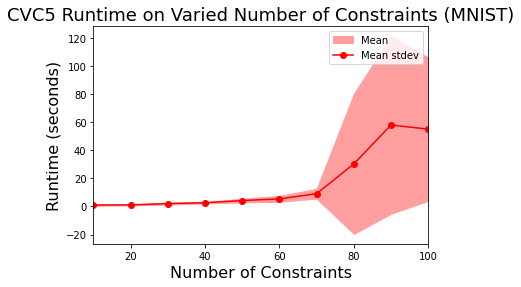

In [8]:
plotRunTime()

In [ ]:
# plt.rcParams.keys()